In [103]:
import findspark
findspark.init('Users/teresachu/server/spark-2.4.3-bin-hadoop2.7')
import pyspark
import matplotlib.pyplot as plt

In [104]:
BCpath = "BackgroundChecks.csv"
GDpath = "GunDeaths.csv"
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA","HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ","NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [105]:
df = spark.read.options(inferSchema='True',header='True').csv(BCpath)
df2 = spark.read.options(inferSchema='True',header='True').csv(GDpath)

In [106]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state full name: string (nullable = true)
 |-- permit: integer (nullable = true)
 |-- permit_recheck: integer (nullable = true)
 |-- handgun: integer (nullable = true)
 |-- long_gun: integer (nullable = true)
 |-- other: integer (nullable = true)
 |-- multiple: integer (nullable = true)
 |-- totals: integer (nullable = true)



In [107]:
#For each state get all information from 1999-2008 for background checks done per year instead of month
stateinfo = list()
df = df.drop("month","state full name")
bdf = df.groupBy("year","state").sum("permit","permit_recheck","long_gun","handgun","multiple","other","totals").orderBy("state")
for state in states:
    stateyear = bdf.filter((bdf.state == state))
    stateinfo.append(stateyear)


In [108]:
for stateinfos in stateinfo:
    stateinfos.show()

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2019|   AL|     348147|               6973|       120258|      160667|         7868|      8515|     690084|
|2015|   AL|     246203|                  0|       176075|      243734|        10781|      9442|     737509|
|2003|   AL|          0|                  0|       114104|       67985|         3620|         0|     225479|
|2002|   AL|          0|                  0|       111339|       65294|         3548|         0|     221008|
|2004|   AL|          0|                  0|       117692|       69932|         3632|         0|     229997|
|2006|   AL|          0|                  0|       121077|       83100|         3865|         0|     243176|
|2001|   AL|       

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2014|   CT|     130334|                  0|        59470|       78637|            0|      1508|     270297|
|2013|   CT|     163105|                  0|        57455|       68920|            0|      4521|     294338|
|2007|   CT|      52769|                  0|        28627|       29991|          664|         0|     116112|
|2018|   CT|      80559|               5194|        24573|       60630|            0|      6729|     177690|
|2012|   CT|     117327|                  0|        53992|       63570|            0|      2521|     237496|
|2004|   CT|      48361|                  0|        25045|       22768|         1113|         0|     100916|
|2003|   CT|      4

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2001|   ID|       5106|                  0|        45814|       17019|         1274|         0|      75400|
|2017|   ID|      65533|                 20|        55018|       44939|         2388|      2803|     182099|
|2016|   ID|      38086|                 44|        55591|       46523|         2406|      2804|     156343|
|2000|   ID|          0|                  0|        46396|       19285|         1165|         0|      77138|
|2018|   ID|      88100|                 76|        54746|       45993|         2660|      4207|     207320|
|2005|   ID|      11236|                  0|        41229|       15320|         1275|         0|      80343|
|2006|   ID|      1

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2000|   LA|          2|                  0|       112960|       59327|         2417|         0|     174706|
|2018|   LA|      32047|               1223|       108625|      121441|         9602|      9667|     307192|
|2011|   LA|          0|                  0|       130125|      101519|         4751|      2020|     264552|
|2003|   LA|          2|                  0|        93440|       51998|         2538|         0|     175693|
|2005|   LA|          1|                  0|       106161|       75090|         2953|         0|     207954|
|2008|   LA|          0|                  0|       129014|       94932|         4218|         0|     248355|
|2012|   LA|       

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2019|   MN|     129788|             297448|       125236|      105932|         5542|     11065|     682356|
|2003|   MN|      56971|                  0|       124062|       39391|         1352|         0|     229728|
|2001|   MN|      38847|                  0|       121855|       28882|         1205|         0|     191935|
|2015|   MN|     253341|                  0|       136831|      110200|         4105|      6247|     519244|
|2006|   MN|      63730|                  0|       131761|       40890|         1610|         0|     244712|
|2004|   MN|      51552|                  0|       128666|       38578|         1459|         0|     227846|
|2002|   MN|      3

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2008|   NH|      17087|                  0|        26434|       23478|          144|         0|      67293|
|2012|   NH|      32899|                  0|        43602|       50981|           19|       457|     128178|
|2016|   NH|      48347|                  0|        44681|       68529|           55|      2206|     165164|
|2019|   NH|      15050|                  7|        33578|       58376|            9|      2644|     112173|
|2000|   NH|        578|                  0|        24898|       14495|          149|         0|      40120|
|2010|   NH|      22799|                  0|        27960|       28788|           75|       160|      79940|
|2007|   NH|      2

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2001|   OH|          0|                  0|       179760|      102266|         5924|         0|     292159|
|2019|   OH|     140046|               2689|       174645|      264798|        12594|     21424|     638495|
|2006|   OH|          0|                  0|       181106|      119652|         6173|         0|     325132|
|2011|   OH|          3|                  0|       186301|      243338|         9949|      5490|     468974|
|2007|   OH|          0|                  0|       178028|      124805|         6133|         0|     326114|
|2004|   OH|          0|                  0|       173266|      127163|         6240|         0|     327040|
|2010|   OH|       

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2013|   SD|         26|                  0|        53625|       31418|         1918|       961|      92055|
|1999|   SD|          0|                  0|        26947|        4168|          212|         0|      31327|
|2008|   SD|          0|                  0|        43438|       14712|          990|         0|      62489|
|2009|   SD|          0|                  0|        42901|       16164|         1131|       132|      63748|
|2016|   SD|      16279|                  0|        49522|       36520|         2184|      3134|     111921|
|2003|   SD|          0|                  0|        35302|        7834|          502|         0|      47683|
|2017|   SD|      1

+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|year|state|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|
+----+-----+-----------+-------------------+-------------+------------+-------------+----------+-----------+
|2007|   WA|      77723|                  0|        96921|       79340|         3462|         0|     276156|
|2006|   WA|      64972|                  0|        96733|       70278|         3182|         0|     255387|
|2004|   WA|      34659|                  0|        86352|       55820|         3173|         0|     203432|
|2015|   WA|     126583|                  0|       129667|      183549|         6814|     15639|     502280|
|2017|   WA|     159260|                713|       138087|      198632|         7790|     22861|     579678|
|2013|   WA|     152569|                  0|       159388|      199142|         6750|     11676|     561122|
|2003|   WA|      5

In [109]:
#For each state get all information from 1999-2008 for gun deaths done
df2.printSchema()

root
 |-- year: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State Code: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Population: integer (nullable = true)



In [110]:
#Get sum of gun deaths per state instead of county
gundeathinfo = list()
gdf = df2.groupBy("year","state").sum("Deaths","Population") \
        .withColumnRenamed("sum(Deaths)", "Deaths") \
        .withColumnRenamed("sum(Population)", "Population").orderBy("state")
for state in states:
    stateyear = gdf.filter((gdf.state == state))
    statepercent = stateyear.withColumn("deathpercent", 100*(stateyear.Deaths/stateyear.Population))
    statepercent.show()
    gundeathinfo.append(statepercent)

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2019|   AL|   899|   4084476|0.022010167277271307|
|2015|   AL|   819|   3992257|0.020514711352500603|
|2003|   AL|   551|   3001184|0.018359420815251583|
|2002|   AL|   494|   2896847|0.017053023511424664|
|2004|   AL|   527|   3231049|0.016310492350936182|
|2006|   AL|   592|   3245975| 0.01823797164180254|
|2001|   AL|   530|   3024897|0.017521257748610946|
|2013|   AL|   660|   3610107|0.018282006599804383|
|2011|   AL|   636|   3603931|0.017647396689892233|
|2008|   AL|   618|   3262073| 0.01894500828154367|
|1999|   AL|   605|   3047241|0.019854025329798332|
|2017|   AL|   989|   4147385|0.023846351375625848|
|2005|   AL|   565|   3098609|0.018233988218584532|
|2016|   AL|   899|   4019906| 0.02236370701205451|
|2007|   AL|   618|   3233744|0.019110974771039388|
|2010|   AL|   595|   3611951|0.016473091689228343|
|2000|   AL|

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2019|   DC|   141|    705749|0.019978774323449272|
|2017|   DC|   100|    693972|0.014409803277365657|
|2001|   DC|   170|    574504|0.029590742623201927|
|2006|   DC|   134|    570681| 0.02348071865017409|
|2009|   DC|   111|    592228| 0.01874278149631561|
|2011|   DC|    86|    617996|0.013915947676036738|
|2012|   DC|    68|    632323|0.010753997561372906|
|2000|   DC|   149|    572059|  0.0260462644587359|
|2016|   DC|   107|    681170|   0.015708266658837|
|2004|   DC|   143|    567754| 0.02518696477699849|
|2003|   DC|   167|    568502| 0.02937544634847371|
|2005|   DC|   154|    567136|0.027153980703041244|
|2018|   DC|   125|    702455|0.017794734182260786|
|2014|   DC|    86|    658893|0.013052195121210879|
|2008|   DC|   137|    580236|  0.0236110823871666|
|2015|   DC|   121|    672228|0.017999845290585934|
|2002|   DC|

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2016|   IA|   113|   1094666|0.010322783387809615|
|2004|   IA|    58|    875305|0.006626261703063504|
|2008|   IA|    64|    789877|0.008102527355524974|
|2010|   IA|    63|    938180|0.006715129292886226|
|2003|   IA|    47|    743245|0.006323621416894833|
|2015|   IA|    76|    859753|0.008839748160227414|
|2014|   IA|    96|   1075025|0.008930024883142252|
|2005|   IA|    58|    858557|0.006755521182635515|
|2011|   IA|    68|    911887|0.007457064307310006|
|2012|   IA|    76|   1059218| 0.00717510465267773|
|2017|   IA|   140|   1293115|0.010826569949308452|
|2009|   IA|    55|    681714| 0.00806789944170136|
|2000|   IA|    61|    812674|0.007506084850751962|
|2019|   IA|   115|   1114244|0.010320899192636443|
|2013|   IA|    97|   1063447|0.009121282019696326|
|2002|   IA|    52|    630888|0.008242350464741761|
|2007|   IA|

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2004|   MS|   226|   1209325|0.018688111136377732|
|2003|   MS|   233|   1179058|0.019761538448490237|
|2002|   MS|   242|   1135316| 0.02131565132526979|
|2006|   MS|   210|   1196909|0.017545193494242252|
|2013|   MS|   282|   1518955| 0.01856539528820801|
|2015|   MS|   337|   1618966|0.020815755241308343|
|2008|   MS|   323|   1535225|0.021039261346056767|
|2012|   MS|   255|   1403365| 0.01817061135200037|
|2011|   MS|   317|   1546196| 0.02050192860413557|
|2007|   MS|   250|   1362549|0.018347963999826796|
|2017|   MS|   404|   1729850| 0.02335462612365234|
|2005|   MS|   192|   1183843|0.016218366793569753|
|2018|   MS|   443|   1639116| 0.02702676320650887|
|2009|   MS|   234|   1388482|0.016852937236492803|
|2000|   MS|   211|   1292325| 0.01632716228502892|
|1999|   MS|   231|   1078072| 0.02142714030231747|
|2010|   MS|

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2009|   NM|   228|   1654199| 0.01378310590201058|
|2008|   NM|   224|   1496271|0.014970550120933974|
|2002|   NM|   230|   1370239| 0.01678539291320711|
|2001|   NM|   174|   1160534|0.014993098004883958|
|2014|   NM|   261|   1631955|0.015993088044707116|
|2016|   NM|   317|   1683333| 0.01883168689736374|
|2007|   NM|   210|   1484405|0.014147082501069452|
|2004|   NM|   195|   1264163|0.015425226019113043|
|2015|   NM|   318|   1722281|0.018463885974472228|
|2005|   NM|   196|   1377459|0.014229098651938096|
|2011|   NM|   226|   1464712|0.015429654430359005|
|1999|   NM|   197|   1223569| 0.01610044059632109|
|2006|   NM|   189|   1301208|0.014524964494531235|
|2019|   NM|   374|   1656703| 0.02257495761159363|
|2017|   NM|   309|   1679514| 0.01839817947334765|
|2018|   NM|   366|   1812671| 0.02019119851313338|
|2003|   NM|

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2005|   SC|   466|   3271017|0.014246333785486289|
|2002|   SC|   454|   3203794|0.014170698865157996|
|2001|   SC|   471|   3202832|0.014705735424149626|
|2010|   SC|   532|   3792468|0.014027804585299073|
|2003|   SC|   464|   3244577|0.014300785587766911|
|2011|   SC|   598|   3961899|0.015093771951278919|
|2018|   SC|   784|   4539789|0.017269525081452023|
|2004|   SC|   447|   3183175|0.014042583269848499|
|2014|   SC|   667|   4164620|0.016015866993867388|
|2006|   SC|   502|   3537594|0.014190435646374344|
|2012|   SC|   646|   4088146|  0.0158017839871668|
|2007|   SC|   483|   3583849|0.013477130314363131|
|2013|   SC|   647|   4171644|0.015509473003928428|
|2008|   SC|   511|   3753911|0.013612469768196423|
|1999|   SC|   454|   3188583|0.014238299583231797|
|2019|   SC|   938|   4773534|0.019650011919889958|
|2009|   SC|

+----+-----+------+----------+--------------------+
|year|state|Deaths|Population|        deathpercent|
+----+-----+------+----------+--------------------+
|2007|   WA|   465|   5597778| 0.00830686747491594|
|2006|   WA|   452|   5216341|0.008665077685680441|
|2004|   WA|   471|   5186115|0.009081942841606868|
|2015|   WA|   631|   6371699|0.009903167114454088|
|2017|   WA|   774|   6773314|0.011427197971332792|
|2013|   WA|   561|   6268644|0.008949303868587848|
|2003|   WA|   467|   5159426| 0.00905139447682746|
|2009|   WA|   530|   5751209|0.009215453655048876|
|2005|   WA|   484|   5404916|0.008954810768566987|
|2019|   WA|   776|   7031134|0.011036626524256257|
|2016|   WA|   589|   6332524|0.009301188593995063|
|2018|   WA|   738|   6895703| 0.01070231708065153|
|1999|   WA|   474|   4802917|0.009869002524923917|
|2002|   WA|   485|   5327329| 0.00910399939632037|
|2010|   WA|   512|   5862303|0.008733768964176707|
|2008|   WA|   504|   5709039|0.008828105745993327|
|2012|   WA|

In [111]:
newgundeathinfo = []
for gunstate in gundeathinfo:
    avgdeath = (gunstate.groupBy("state").sum("deathpercent").collect()[0][1])/gunstate.count()
    
    #Add outcome col called above average as 0 or 1 
    newgunstate = gunstate.withColumn("label", (gunstate.deathpercent > avgdeath).cast("int"))
    newgundeathinfo.append(newgunstate)

In [112]:
# Join the attributes of the background chck with the death information to make new table
stateCDF = []
for i in range(len(stateinfo) ):
    combined = stateinfo[i].join(newgundeathinfo[i],['state','year'])
    stateCDF.append(combined)

In [113]:
for table in stateCDF:
    table.show()

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   AL|2019|     348147|               6973|       120258|      160667|         7868|      8515|     690084|   899|   4084476|0.022010167277271307|    1|
|   AL|2015|     246203|                  0|       176075|      243734|        10781|      9442|     737509|   819|   3992257|0.020514711352500603|    1|
|   AL|2003|          0|                  0|       114104|       67985|         3620|         0|     225479|   551|   3001184|0.018359420815251583|    0|
|   AL|2002|          0|                  0|       111339|       65294|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   AR|2002|       6163|                  0|        82190|       30448|         2545|         0|     153424|   244|   1476519|0.016525354567059416|    0|
|   AR|2004|       8214|                  0|        85476|       31085|         2545|         0|     158366|   189|   1088194| 0.01736822662135612|    1|
|   AR|2017|      39473|               8380|        76765|       72100|         4498|      2765|     237629|   408|   1968919|0.020722030718378966|    1|
|   AR|2019|      35865|               9224|        68773|       68549|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   DC|2019|       4376|                  0|           41|        1295|           19|         0|       5926|   141|    705749|0.019978774323449272|    0|
|   DC|2017|        729|                  0|           45|         756|            8|         0|       1540|   100|    693972|0.014409803277365657|    0|
|   DC|2001|          0|                  0|            5|          12|            0|         0|         17|   170|    574504|0.029590742623201927|    1|
|   DC|2006|          0|                  0|          196|          54|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   GA|2007|      46333|                  0|       109975|       82899|         3676|         0|     270468|   851|   5973420| 0.01424644508506015|    1|
|   GA|2014|     156469|                  0|       124217|      145921|         6693|      3997|     484580|   996|   7093366|0.014041288719629017|    1|
|   GA|2016|     233115|                  0|       128277|      194800|         7478|      6474|     612985|  1192|   7865924|0.015153973010672363|    1|
|   GA|2010|      95959|                  0|        95541|       99145|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   IN|2011|      78242|                  0|       130012|      136250|         4715|      3860|     359840|   372|   3204624|0.011608226113266331|    0|
|   IN|2013|     173553|                  0|       183676|      215778|         7913|      8997|     597124|   620|   4315118|0.014368089122939395|    1|
|   IN|2012|      89993|                  0|       174306|      188980|         7372|      7403|     475607|   561|   4187020| 0.01339855075925121|    0|
|   IN|2009|      31606|                  0|       118446|      110487|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   LA|2000|          2|                  0|       112960|       59327|         2417|         0|     174706|   618|   3080366|0.020062551008548982|    0|
|   LA|2018|      32047|               1223|       108625|      121441|         9602|      9667|     307192|   853|   3805980|0.022412098854959827|    1|
|   LA|2011|          0|                  0|       130125|      101519|         4751|      2020|     264552|   729|   3340179| 0.02182517763269573|    1|
|   LA|2003|          2|                  0|        93440|       51998|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   MI|2000|     121971|                  0|       177663|         964|           63|         0|     300661|   877|   7152494|0.012261457332225653|    1|
|   MI|2005|     141407|                  0|       158049|       33065|          807|         0|     337035|   856|   7311310|0.011707888189667788|    0|
|   MI|2002|     152273|                  0|       173907|       23208|          435|         0|     353540|   893|   7497618|0.011910449425404175|    0|
|   MI|2011|     201143|                  0|       134412|       15224|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   MT|2000|          2|                  0|        51480|       18401|         1226|         0|      71115|    55|    379982|  0.0144743698385713|    0|
|   MT|2015|      12831|                  0|        57550|       35977|         2592|      1355|     127705|   115|    646286|0.017793979755092948|    1|
|   MT|2001|       1243|                  0|        52024|       17931|         1295|         0|      74752|    94|    510844| 0.01840092082905936|    1|
|   MT|2008|       6854|                  0|        51084|       22710|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   NJ|2016|          0|                  0|        49099|       70249|            0|      2505|     121853|   453|   8203713|0.005521889905217308|    1|
|   NJ|2018|          0|                  0|        39488|       51074|            0|      2270|      93124|   382|   8050897|0.004744812907182889|    0|
|   NJ|2004|          0|                  0|        22384|       14399|          566|         0|      37376|   406|   7351289|0.005522840960272...|    1|
|   NJ|2012|          0|                  0|        38508|       45151|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   ND|2011|       5801|                  0|        36835|       15144|          721|       275|      61032|    11|     64072| 0.01716818579098514|    1|
|   ND|2015|       7315|                  0|        36980|       20610|         1040|       907|      69429|    26|    264503|0.009829756184239875|    0|
|   ND|2013|      12926|                  0|        44862|       23594|         1160|       643|      85812|    10|     29595|  0.0337894914681534|    1|
|   ND|2017|      11712|                  0|        30691|       19693|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   PA|2000|       4424|                  0|       467484|          10|         9376|         0|     481294|  1051|   9648049|0.010893394094495168|    0|
|   PA|2011|       3209|                  0|       714553|          94|         1072|         3|     718934|  1297|  11186623|0.011594204971419882|    1|
|   PA|2017|     316614|                  0|       168472|      566320|            0|      1082|    1062651|  1460|  11252329|0.012975091645471795|    1|
|   PA|2014|     239166|                  0|       151566|      507888|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   TN|2018|     205089|                  0|       179432|      290067|            0|     18793|     694101|   931|   4951734|0.018801494587552564|    1|
|   TN|2004|      10900|                  0|       127351|       87637|         3513|         0|     229401|   561|   3744274| 0.01498287785562702|    0|
|   TN|2003|          1|                  0|       126036|       90007|         3737|         0|     219783|   512|   3198992|0.016005041588100254|    0|
|   TN|2001|          3|                  0|       129355|       97966|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   VA|2012|          0|                  0|       203068|      235889|            0|      9797|     448754|   490|   4665121|0.010503478902262128|    0|
|   VA|2015|       6028|                  0|       184030|      262120|            0|     10728|     462997|   568|   5242491| 0.01083454411271283|    0|
|   VA|2010|          0|                  0|       145468|      169736|         5579|         0|     320783|   514|   4398709| 0.01168524673944105|    1|
|   VA|2008|          0|                  0|       137713|      137088|     

+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|state|year|sum(permit)|sum(permit_recheck)|sum(long_gun)|sum(handgun)|sum(multiple)|sum(other)|sum(totals)|Deaths|Population|        deathpercent|label|
+-----+----+-----------+-------------------+-------------+------------+-------------+----------+-----------+------+----------+--------------------+-----+
|   WY|2014|       7046|                  0|        27169|       21655|         1249|       879|      63063|    29|    178013| 0.01629094504333953|    0|
|   WY|2007|       3296|                  0|        23828|       11317|          693|         0|      42770|    25|    160019|0.015623144751560753|    0|
|   WY|2018|       6007|                109|        24978|       21617|         1358|      1625|      60150|    72|    259743| 0.02771970755708527|    1|
|   WY|2010|       5916|                  0|        21490|       14589|     

In [114]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import math
import statistics

In [115]:
def getStatistics(column):
    mean = sum(column)/len(column)
    std = statistics.pstdev(column)
    return mean,std

In [116]:
#Logistic Regression anaylsis using pyspark library 
#To show usage of apache spark 
predictionState = []
for table in stateCDF:
    #STATE NAME
    statename = table.select("state").first()[0]
    
    #Get info to pandas to do mlib
    #Remove attributes that will not be feature or outcome
    newtable = table.drop("state","year","Deaths","Population","deathpercent")
    
    #Get all features that can be attributes which is everything except above average
    features = []
    for feature in newtable.dtypes:
        if feature[1] != 'int':
            features.append(feature[0])
    
    #Use vector assembler for logistic regression prediction
    vectorass = VectorAssembler(inputCols = features, outputCol='features')
    vectorDF = vectorass.transform(newtable)
    vectorDF = vectorDF.select(['features', 'label'])
    #Split into training and test data
    train, test = vectorDF.randomSplit([0.7, 0.3])
    
    print("train data")
    train.show()
    print("test data")
    test.show()
    
    #Run Logistic Regression on data
    logReg = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=6)
    trainedModel = logReg.fit(train)
    prediction = trainedModel.transform(test)
    
    print("prediction")
    prediction.show()
    #Evaluate data
        
    evaluator = BinaryClassificationEvaluator()
    accuracy =  evaluator.evaluate(prediction)
    predictionState.append([statename, accuracy])



train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,111339.0...|    0|
|[0.0,0.0,114104.0...|    0|
|[0.0,0.0,114695.0...|    1|
|[0.0,0.0,117692.0...|    0|
|[0.0,0.0,119189.0...|    0|
|[0.0,0.0,134914.0...|    0|
|[12.0,0.0,136767....|    0|
|[117.0,0.0,143499...|    0|
|[2619.0,0.0,14697...|    0|
|[4621.0,0.0,13651...|    0|
|[5036.0,0.0,14629...|    0|
|[100231.0,0.0,203...|    0|
|[291039.0,0.0,121...|    1|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,121077.0...|    0|
|[0.0,0.0,149017.0...|    1|
|[6135.0,0.0,18407...|    0|
|[204273.0,0.0,170...|    0|
|[246203.0,0.0,176...|    1|
|[253338.0,1401.0,...|    1|
|[271958.0,263.0,8...|    1|
|[348147.0,6973.0,...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,207982.0...|    0|
|[1.0,0.0,132372.0...|    0|
|[1.0,0.0,132671.0...|    0|
|[2.0,0.0,147253.0...|    0|
|[3079.0,0.0,11217...|    0|
|[10012.0,0.0,1095...|    1|
|[12928.0,0.0,1296...|    0|
|[41271.0,0.0,1709...|    1|
|[68665.0,0.0,1669...|    1|
|[75319.0,0.0,1476...|    1|
|[85087.0,0.0,1800...|    1|
|[89282.0,0.0,1880...|    0|
|[112566.0,0.0,160...|    1|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,110700.0...|    0|
|[0.0,0.0,178889.0...|    0|
|[1280.0,0.0,14616...|    0|
|[9584.0,0.0,99640...|    0|
|[9701.0,0.0,11620...|    0|
|[12522.0,0.0,1173...|    0|
|[48739.0,0.0,1631...|    1|
|[54514.0,0.0,1560...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0,122921.0...|    0|[3.50758389248786...|[0.97090278536085...|       0.0|
|[0.0,0.0,144746.0...|    0|[2.73532768431972...|[0.93907934437004...|       0.0|
|[0.0,0.0,179478.0...|    0|[0.93516346814793...|[0.71812166606606...|       0.0|
|[0.0,0.0,187986.0...|    1|[-0.1407155534963...|[0.46487904462372...|       1.0|
|[10.0,0.0,212419....|    1|[-2.0448844217473...|[0.11457030342477...|       1.0|
|[236486.0,0.0,278...|    1|[-7.3098463454548...|[6.68472672123375...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[28263.0,0.0,1216...|    1|
|[29539.0,0.0,1227...|    1|
|[33641.0,0.

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,115552.0...|    0|
|[0.0,0.0,171369.0...|    1|
|[72839.0,0.0,7522...|    1|
|[78242.0,0.0,1300...|    0|
|[89993.0,0.0,1743...|    0|
|[258993.0,0.0,159...|    1|
|[474341.0,7754.0,...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0,115552.0...|    0|[4.17657958380708...|[0.98488116369116...|       0.0|
|[0.0,0.0,171369.0...|    1|[4.30549713077253...|[0.98668549279284...|       0.0|
|[72839.0,0.0,7522...|    1|[1.22404822101924...|[0.77277517639191...|       0.0|
|[78242.0,0.0,1300...|    0|[1.08032111470122...|[0.74655474650359...|       0.0|
|[89993.0,0.0,1743...|    0|[0.84734167194803...|[0.70000920034715...|       0.0|
|[258993.0,0.

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,32362.0,...|    0|
|[0.0,0.0,34958.0,...|    0|
|[0.0,0.0,35281.0,...|    0|
|[0.0,0.0,35648.0,...|    1|
|[0.0,0.0,40838.0,...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0,32362.0,...|    0|[4.32447461548962...|[0.98693251546392...|       0.0|
|[0.0,0.0,34958.0,...|    0|[3.58965555376003...|[0.97313387736505...|       0.0|
|[0.0,0.0,35281.0,...|    0|[3.17437763601423...|[0.95985859517429...|       0.0|
|[0.0,0.0,35648.0,...|    1|[2.09855255650362...|[0.89076241534020...|       0.0|
|[0.0,0.0,40838.0,...|    1|[0.56731193437559...|[0.63814268696314...|       0.0|
+--------------------+-----+--------------------+--------------------+-

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,77077.0,...|    1|
|[0.0,0.0,113063.0...|    1|
|[2.0,0.0,90411.0,...|    0|
|[4.0,0.0,105749.0...|    0|
|[5190.0,0.0,10436...|    0|
|[7458.0,0.0,92708...|    0|
|[8266.0,0.0,88191...|    1|
|[10652.0,0.0,9016...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0,77077.0,...|    1|[1.94195668116412...|[0.87456694799199...|       0.0|
|[0.0,0.0,113063.0...|    1|[7.30018618553493...|[0.99932504286347...|       0.0|
|[2.0,0.0,90411.0,...|    0|[3.73506915660853...|[0.97668504331963...|       0.0|
|[4.0,0.0,105749.0...|    0|[6.29275587912598...|[0.99815375941952...|       0.0|
|[5190.0,0.0,10436...|    0|[4.67192602523015...|[0.99073245512700

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[15279.0,0.0,2912...|    0|
|[15486.0,0.0,2835...|    0|
|[15609.0,0.0,2588...|    1|
|[16397.0,0.0,3091...|    1|
|[17188.0,0.0,2968...|    0|
|[21499.0,0.0,2938...|    1|
|[25172.0,0.0,3007...|    1|
|[27728.0,0.0,2814...|    0|
|[29559.0,0.0,2831...|    0|
|[39333.0,0.0,2635...|    1|
|[43394.0,1132.0,2...|    1|
|[45865.0,981.0,24...|    0|
|[48284.0,0.0,3475...|    1|
|[48582.0,719.0,22...|    0|
|[56897.0,0.0,3178...|    0|
|[58386.0,664.0,26...|    1|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[15722.0,0.0,2734...|    0|
|[17793.0,0.0,2897...|    1|
|[20314.0,0.0,2958...|    0|
|[32299.0,0.0,3080...|    1|
|[49150.0,0.0,2699...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[28505.0,0.0,2020...|    0|
|[34216.0,0.0,1485...|    1|
|[34301.0,16545.0,...|    0|
|[35594.0,0.0,1096...|    1|
|[35622.0,0.0,1407...|    1|
|[35833.0,0.0,1036...|    1|
|[39598.0,26234.0,...|    0|
|[39889.0,0.0,1842...|    0|
|[39927.0,0.0,1313...|    1|
|[48562.0,0.0,1032...|    1|
|[56696.0,0.0,1097...|    1|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[30047.0,0.0,1475...|    1|
|[30529.0,0.0,2144...|    0|
|[34512.0,20387.0,...|    0|
|[35791.0,0.0,1110...|    1|
|[37459.0,0.0,1635...|    1|
|[41723.0,0.0,1276...|    1|
|[49646.0,1846.0,1...|    0|
|[53844.0,0.0,9992...|    1|
|[66554.0,0.0,1085...|    1|
|[76653.0,0.0,1805...|    0|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,95103.0,...|    0|
|[431.0,0.0,133862...|    0|
|[482.0,0.0,101911...|    0|
|[538.0,0.0,118887...|    1|
|[545.0,0.0,103452...|    0|
|[553.0,0.0,125378...|    1|
|[566.0,0.0,98202....|    0|
|[578.0,0.0,106685...|    0|
|[617.0,0.0,92310....|    1|
|[690.0,0.0,102016...|    0|
|[723.0,0.0,91343....|    0|
|[38968.0,170.0,13...|    1|
|[60616.0,6982.0,1...|    1|
|[61444.0,988.0,12...|    1|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[92.0,0.0,83512.0...|    0|
|[470.0,0.0,98103....|    0|
|[486.0,0.0,98279....|    1|
|[559.0,0.0,133202...|    1|
|[608.0,0.0,103276...|    0|
|[691.0,0.0,90360....|    0|
|[2903.0,6.0,14302...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,121906.0...|    0|
|[0.0,0.0,138475.0...|    0|
|[1.0,0.0,126036.0...|    0|
|[3.0,0.0,128568.0...|    1|
|[136.0,0.0,129725...|    1|
|[74627.0,0.0,2060...|    0|
|[96198.0,0.0,1581...|    0|
|[100410.0,0.0,135...|    0|
|[102940.0,0.0,135...|    0|
|[103268.0,0.0,189...|    0|
|[106082.0,62697.0...|    1|
|[124271.0,0.0,216...|    0|
|[144554.0,2139.0,...|    1|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[3.0,0.0,129355.0...|    0|
|[3.0,0.0,130240.0...|    1|
|[10900.0,0.0,1273...|    0|
|[27999.0,0.0,1270...|    0|
|[35551.0,0.0,1227...|    1|
|[141621.0,0.0,198...|    1|
|[205089.0,0.0,179...|    1|
|[259782.0,0.0,187...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

train data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[12977.0,0.0,8832...|    1|
|[20104.0,0.0,7773...|    0|
|[32748.0,0.0,8266...|    0|
|[34659.0,0.0,8635...|    0|
|[40050.0,0.0,9221...|    0|
|[54061.0,0.0,8091...|    0|
|[77723.0,0.0,9692...|    0|
|[80101.0,0.0,1038...|    0|
|[82055.0,0.0,1130...|    0|
|[83867.0,0.0,1113...|    0|
|[101640.0,0.0,116...|    0|
|[126583.0,0.0,129...|    1|
|[132184.0,0.0,130...|    1|
|[152569.0,0.0,159...|    0|
|[159260.0,713.0,1...|    1|
|[268274.0,652.0,1...|    0|
+--------------------+-----+

test data
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[50549.0,0.0,7441...|    0|
|[64972.0,0.0,9673...|    0|
|[132907.0,0.0,154...|    1|
|[172462.0,2487.0,...|    1|
|[177654.0,736.0,1...|    1|
+--------------------+-----+

prediction
+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPredi

In [117]:
overallaccuracy = 0
for prediction in predictionState:
    print("State: ",prediction[0], " Accuracy: ", prediction[1])
    if (prediction[1] > 0.85):
        print("Current Background Checks indicator on deaths \n")
    else:
        print("Avenues other than background checks can be considered or increase background checks\n")
    overallaccuracy += prediction[1]
print("Overall Accuracy: ",overallaccuracy/50)

State:  AL  Accuracy:  0.8666666666666667
Current Background Checks indicator on deaths 

State:  AK  Accuracy:  0.6666666666666666
Avenues other than background checks can be considered or increase background checks

State:  AZ  Accuracy:  1.0
Current Background Checks indicator on deaths 

State:  AR  Accuracy:  0.875
Current Background Checks indicator on deaths 

State:  CA  Accuracy:  1.0
Current Background Checks indicator on deaths 

State:  CO  Accuracy:  0.8333333333333334
Avenues other than background checks can be considered or increase background checks

State:  CT  Accuracy:  0.7
Avenues other than background checks can be considered or increase background checks

State:  DC  Accuracy:  1.0
Current Background Checks indicator on deaths 

State:  DE  Accuracy:  0.9375
Current Background Checks indicator on deaths 

State:  FL  Accuracy:  1.0
Current Background Checks indicator on deaths 

State:  GA  Accuracy:  0.5
Avenues other than background checks can be considered or i

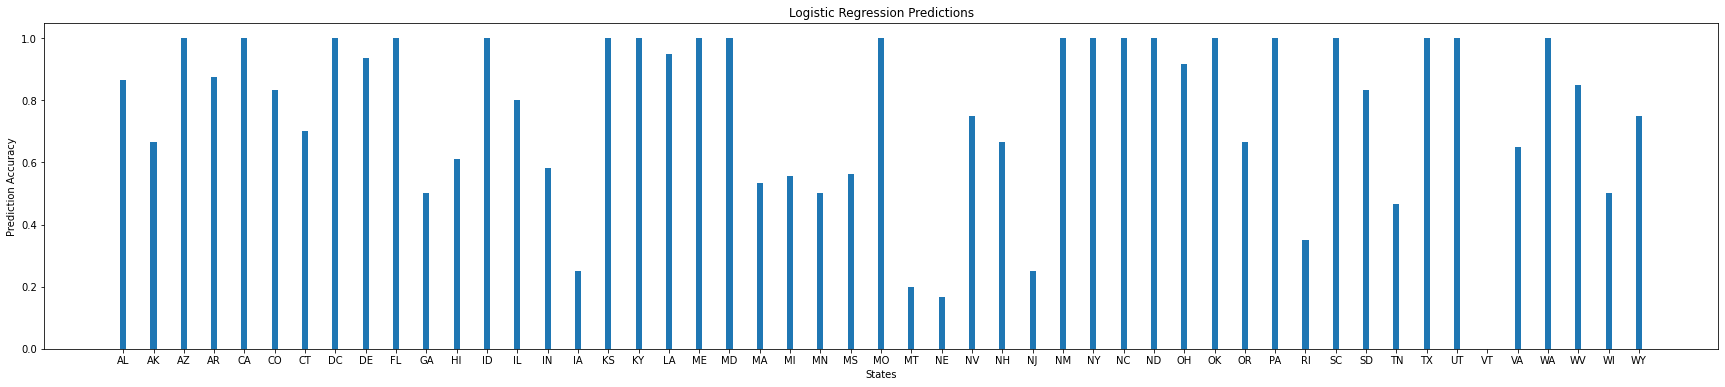

In [118]:
#Graph results
xlabel = [prediction[0] for prediction in predictionState]
yvalues = [prediction[1] for prediction in predictionState]
  
fig = plt.figure(figsize = (30, 6))
plt.bar(xlabel,yvalues,width = 0.2)
 
plt.xlabel("States")
plt.ylabel("Prediction Accuracy")
plt.title("Logistic Regression Predictions")
plt.show()

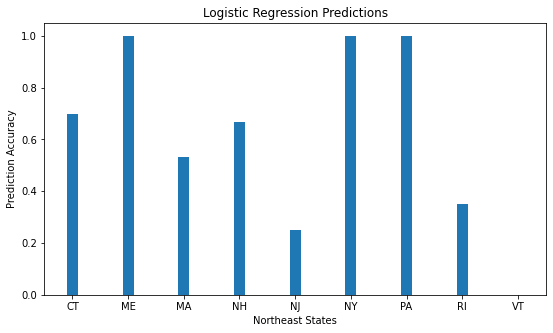

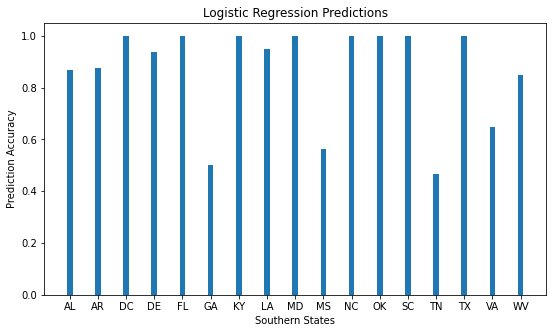

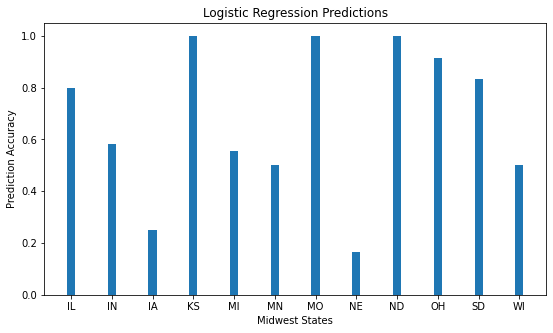

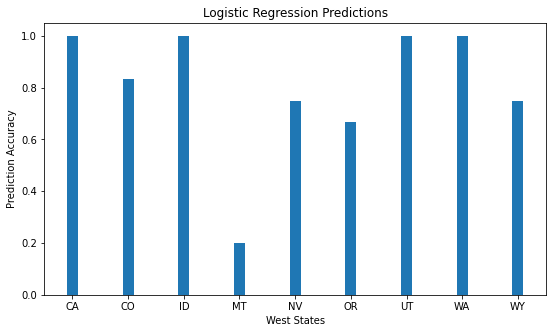

In [119]:
#Get accuracies for states in each region
north = ["PA","NY","VT","ME","NH","MA","CT","RI","NJ"]
midwest = ["ND","SD","NE","MN","KS","MO","IA","WI","IL","IN","MI","OH"]
south = ["TX","OK","AR","LA","MS","AL","GA","FL","TN","SC","NC","KY","VA","WV","DC","DE","MD"]
west = ["WA","CA","UT","CO","NV","OR","MT","ID","WY"]

# Creating the bar plot for the northern states
Nxlabel = [prediction[0] for prediction in predictionState if prediction[0] in north]
Nyvalues = [prediction[1] for prediction in predictionState if prediction[0] in north] 
fig = plt.figure(figsize = (9, 5))
plt.bar(Nxlabel,Nyvalues,width = 0.2)
plt.xlabel("Northeast States")
plt.ylabel("Prediction Accuracy")
plt.title("Logistic Regression Predictions")
plt.show()

# Creating the bar plot for the south states
Sxlabel = [prediction[0] for prediction in predictionState if prediction[0] in south]
Syvalues = [prediction[1] for prediction in predictionState if prediction[0] in south] 
fig = plt.figure(figsize = (9, 5))
plt.bar(Sxlabel,Syvalues,width = 0.2)
plt.xlabel("Southern States")
plt.ylabel("Prediction Accuracy")
plt.title("Logistic Regression Predictions")
plt.show()

# Creating the bar plot for the Midwest
Mxlabel = [prediction[0] for prediction in predictionState if prediction[0] in midwest]
Myvalues = [prediction[1] for prediction in predictionState if prediction[0] in midwest] 
fig = plt.figure(figsize = (9, 5))
plt.bar(Mxlabel,Myvalues,width = 0.2)
plt.xlabel("Midwest States")
plt.ylabel("Prediction Accuracy")
plt.title("Logistic Regression Predictions")
plt.show()

# Creating the bar plot for the West
Wxlabel = [prediction[0] for prediction in predictionState if prediction[0] in west]
Wyvalues = [prediction[1] for prediction in predictionState if prediction[0] in west] 
fig = plt.figure(figsize = (9, 5))
plt.bar(Wxlabel,Wyvalues,width = 0.2)
plt.xlabel("West States")
plt.ylabel("Prediction Accuracy")
plt.title("Logistic Regression Predictions")
plt.show()



In [120]:
#Initial weight vector per feature
import random
def initialWeight(traindatarow):
    weight = []
    numfeatures = len(traindatarow)
    for i in range(numfeatures):
        weight.append(random.uniform(-0.1,0.1))
    return weight

In [121]:
def output(traindata,weight):
    numfeatures = len(traindata)
    output = 1
    for i in range(numfeatures):
        output += traindata[i]*weight[i]
    
    perceptron = -1
    if (output>0):
        perceptron = 1
    return perceptron

In [122]:
#Update weight
def updateWeight(weight,traindata,label,rate,iterations):
    o = output(traindata,weight)
    
    if (label == 0):
        o = output(traindata,weight)
        for j in range(len(traindata)):
            change = rate*traindata[j]*(-1-o)
            weight[j] += change
    else:
        o = output(traindata,weight)
        for j in range(len(traindata)):
            change = rate*traindata[j]*(1-o)
            weight[j] += change
    if (iterations>1):
        weight = updateWeight(weight,traindata,label,rate,iterations-1)
    return weight

In [123]:
def prediction(traindataTable,weight):
    #Above Average= 1 and Below Average =-1
    features = traindataTable.select('features').collect()
    labels = traindataTable.select('label').collect()
    accuracy = 0
    
    for i in range(len(features)):
        fvector = features[i][0]
        outcome = labels[i][0]
        sum = output(fvector,weight)
        
        if (sum==1 and outcome == 1) or (sum == -1 and outcome == 0):
            accuracy+=1
    return float(accuracy)/len(features)

In [124]:
rate = 0.05
iterations = 6
overallaccuracy = 0
SVMpredictions = []
for table in stateCDF:
    #STATE NAME
    statename = table.select("state").first()[0]

    #Get info to pandas to do mlib
    #Remove attributes that will not be feature or outcome
    newtable = table.drop("state","year","Deaths","Population","deathpercent")

    #Get all features that can be attributes which is everything except above average
    features = []
    for feature in newtable.dtypes:
        if feature[1] != 'int':
            features.append(feature[0])
    
    #Use vector assembler just to split up data randomly
    vectorass = VectorAssembler(inputCols = features, outputCol='features')
    vectorDF = vectorass.transform(newtable)
    vectorDF = vectorDF.select(['features', 'label'])
    
    #Split into training and test data
    train, test = vectorDF.randomSplit([0.7, 0.3],seed = 12)
    
    featurerows = train.select('features').collect()
    labels = train.select('label').collect()
    
    #Get predictions
    weight = initialWeight(featurerows[0][0])
    
    for i in range(len(featurerows)):
        fvector = featurerows[i][0]
        outcome = labels[i][0]
         
        weight = updateWeight(weight,fvector,outcome,rate,iterations)
    
    test_result = prediction(test,weight)
    SVMpredictions.append([statename,test_result])
    print("State: ",statename, " Accuracy: ", test_result)
    overallaccuracy += test_result
    

State:  AL  Accuracy:  0.8
State:  AK  Accuracy:  0.4
State:  AZ  Accuracy:  0.8
State:  AR  Accuracy:  0.6
State:  CA  Accuracy:  0.4
State:  CO  Accuracy:  0.2
State:  CT  Accuracy:  0.4
State:  DC  Accuracy:  0.4
State:  DE  Accuracy:  0.8
State:  FL  Accuracy:  0.4
State:  GA  Accuracy:  0.8
State:  HI  Accuracy:  0.4
State:  ID  Accuracy:  0.6
State:  IL  Accuracy:  0.8
State:  IN  Accuracy:  0.4
State:  IA  Accuracy:  0.2
State:  KS  Accuracy:  0.2
State:  KY  Accuracy:  0.4
State:  LA  Accuracy:  0.8
State:  ME  Accuracy:  0.2
State:  MD  Accuracy:  0.4
State:  MA  Accuracy:  0.6


State:  MI  Accuracy:  0.6
State:  MN  Accuracy:  0.6
State:  MS  Accuracy:  0.4
State:  MO  Accuracy:  0.6
State:  MT  Accuracy:  0.6
State:  NE  Accuracy:  0.4
State:  NV  Accuracy:  1.0
State:  NH  Accuracy:  0.4
State:  NJ  Accuracy:  1.0
State:  NM  Accuracy:  0.4
State:  NY  Accuracy:  0.6
State:  NC  Accuracy:  0.0
State:  ND  Accuracy:  1.0
State:  OH  Accuracy:  0.4
State:  OK  Accuracy:  1.0


State:  OR  Accuracy:  0.4
State:  PA  Accuracy:  0.6
State:  RI  Accuracy:  0.4
State:  SC  Accuracy:  0.4
State:  SD  Accuracy:  0.4
State:  TN  Accuracy:  0.4
State:  TX  Accuracy:  0.6
State:  UT  Accuracy:  0.6
State:  VT  Accuracy:  0.0
State:  VA  Accuracy:  0.6
State:  WA  Accuracy:  0.6
State:  WV  Accuracy:  0.6
State:  WI  Accuracy:  0.4
State:  WY  Accuracy:  0.25


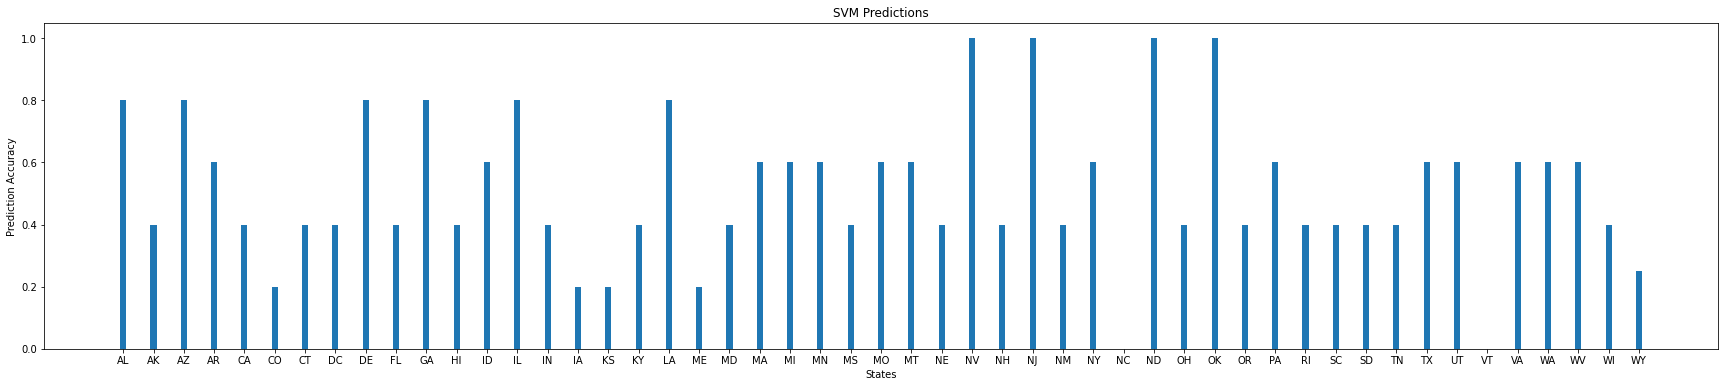

In [125]:
#Graph results
import matplotlib.pyplot as plt
SVMxlabel = [prediction[0] for prediction in SVMpredictions]
SVMyvalues = [prediction[1] for prediction in SVMpredictions]
  
fig = plt.figure(figsize = (30, 6))
 
# creating the bar plot
plt.bar(SVMxlabel,SVMyvalues,width = 0.2)
 
plt.xlabel("States")
plt.ylabel("Prediction Accuracy")
plt.title("SVM Predictions")
plt.show()

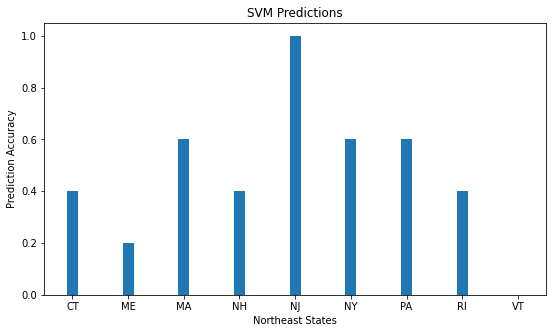

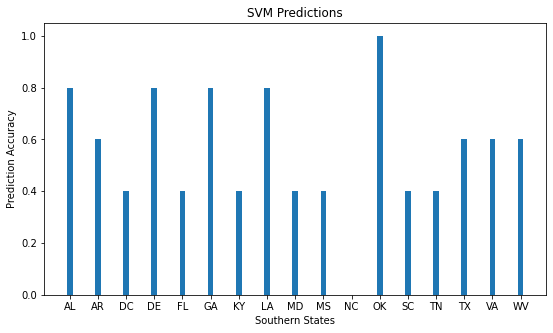

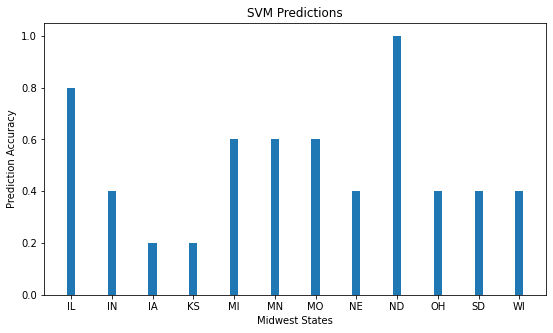

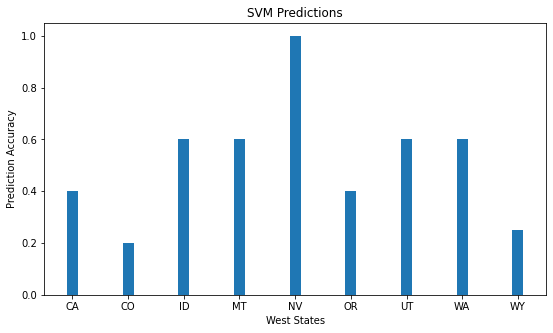

In [126]:
# Creating the bar plot for the northern states
SVMNxlabel = [prediction[0] for prediction in SVMpredictions if prediction[0] in north]
SVMNyvalues = [prediction[1] for prediction in SVMpredictions if prediction[0] in north] 
fig = plt.figure(figsize = (9, 5))
plt.bar(SVMNxlabel,SVMNyvalues,width = 0.2)
plt.xlabel("Northeast States")
plt.ylabel("Prediction Accuracy")
plt.title("SVM Predictions")
plt.show()

# Creating the bar plot for the south states
SVMSxlabel = [prediction[0] for prediction in SVMpredictions if prediction[0] in south]
SVMSyvalues = [prediction[1] for prediction in SVMpredictions if prediction[0] in south] 
fig = plt.figure(figsize = (9, 5))
plt.bar(SVMSxlabel,SVMSyvalues,width = 0.2)
plt.xlabel("Southern States")
plt.ylabel("Prediction Accuracy")
plt.title("SVM Predictions")
plt.show()

# Creating the bar plot for the Midwest
SVMMxlabel = [prediction[0] for prediction in SVMpredictions if prediction[0] in midwest]
SVMMyvalues = [prediction[1] for prediction in SVMpredictions if prediction[0] in midwest] 
fig = plt.figure(figsize = (9, 5))
plt.bar(SVMMxlabel,SVMMyvalues,width = 0.2)
plt.xlabel("Midwest States")
plt.ylabel("Prediction Accuracy")
plt.title("SVM Predictions")
plt.show()

# Creating the bar plot for the West
SVMWxlabel = [prediction[0] for prediction in SVMpredictions if prediction[0] in west]
SVMWyvalues = [prediction[1] for prediction in SVMpredictions if prediction[0] in west] 
fig = plt.figure(figsize = (9, 5))
plt.bar(SVMWxlabel,SVMWyvalues,width = 0.2)
plt.xlabel("West States")
plt.ylabel("Prediction Accuracy")
plt.title("SVM Predictions")
plt.show()



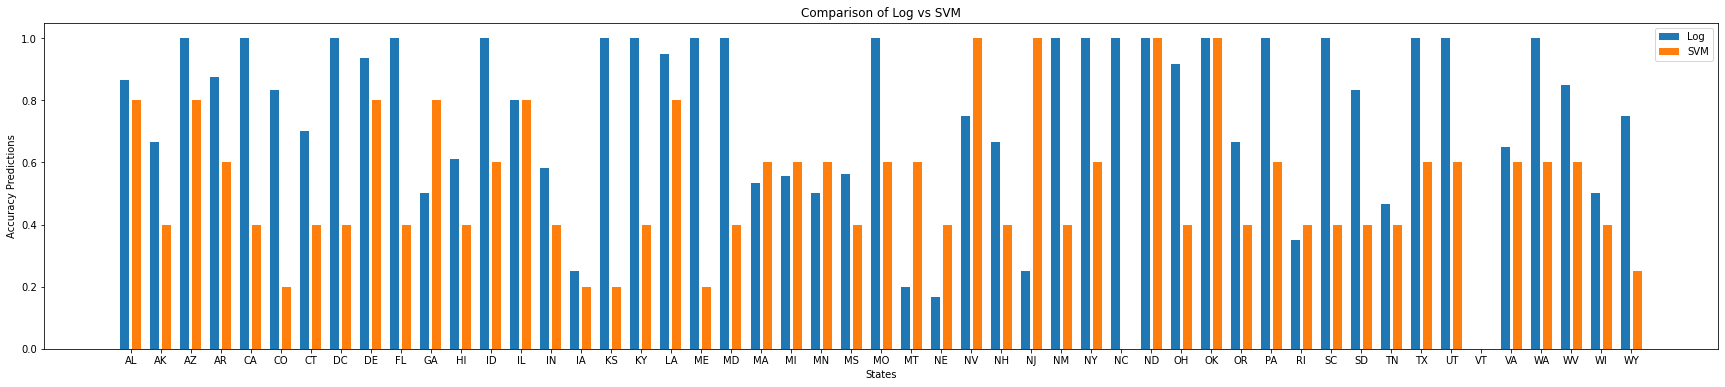

In [127]:
#Compare and anaylze both results together
import numpy as np 
xaxisEntity = np.arange(len(xlabel))
fig = plt.figure(figsize = (30, 6))
plt.bar(xaxisEntity - 0.2, yvalues, 0.3, label = 'Log')
plt.bar(xaxisEntity + 0.2, SVMyvalues, 0.3, label = 'SVM')
  
plt.xticks(xaxisEntity, xlabel)
plt.xlabel("States")
plt.ylabel("Accuracy Predictions")
plt.title("Comparison of Log vs SVM")
plt.legend()
plt.show()

In [128]:
def getSigmoid(inputList):
    siglist = []
    for x in inputList:
        siglist.append(1 / (1 + math.exp(-x)))
    return np.array(siglist)

In [129]:
def updateWeightBias(featureRows,labels,num_rows,r,weight,bias): 
    weightedRows = np.dot(featureRows, weight)+ bias
    sig = getSigmoid(weightedRows)
    sigOutcome = sig-labels.T
    
    #Change weight and bias values
    weight = weight - ((r/num_rows) * np.dot(featureRows.T,sigOutcome))
    bias = bias - ((r/num_rows) * np.sum(sigOutcome))
    return weight,bias

In [130]:
def modelLogReg(featureRows,labels,rows,columns,r,iters):
    weight = np.zeros(columns)
    bias = 0
    for i in range(iters): 
        weight,bias = updateWeightBias(featureRows,labels,rows,r,weight,bias)
    return weight,bias

In [131]:
def make_predictions(test,weight,bias):
    
    testfeaturerows = test.drop('label').toPandas()
    testlabels = test.select('label').toPandas()
    
    #Normalize features for e overload
    normalized = testfeaturerows.copy()
    for column in testfeaturerows.columns:
        if (column != "label" and testfeaturerows[column].abs().max() != 0):
                normalized[column] = testfeaturerows[column] /testfeaturerows[column].abs().max()
    
    results = np.dot(normalized, weight)+ bias
    predictions = getSigmoid(results)
    correct = 0
    total = 0
    for prediction in predictions:
        result = 0
        if (prediction > 0.5):
            result = 1
        if (result == testlabels.values[total]):
            correct+=1
        total +=1
    return correct/total
    

In [132]:
#Log regression 
selfLog = []
for table in stateCDF:
    #STATE NAME
    statename = table.select("state").first()[0]

    #Get info to pandas to do mlib
    #Remove attributes that will not be feature or outcome
    newtable = table.drop("state","year","Deaths","Population","deathpercent")

    #Get all features that can be attributes which is everything except above average
    features = []
    for feature in newtable.dtypes:
        if feature[1] != 'int':
            features.append(feature[0])
    features.append('label')
               
    #Use vector assembler just to split up data randomly
    vectorDF = vectorass.transform(newtable)
    vectorDF = vectorDF.select(features)
    
    #Split into training and test data
    train, test = vectorDF.randomSplit([0.7, 0.3],seed = 12)
    
    #Get features for the x axis and the label which is the y axis
    featurerows = train.drop('label').toPandas()
    labels = train.select('label').toPandas()
    
    #Normalize features
    normalized = featurerows.copy()
    for column in features:
        if (column != "label" and featurerows[column].abs().max() != 0):
                normalized[column] = featurerows[column] /featurerows[column].abs().max()
                
    weight,bias = modelLogReg(normalized,labels['label'],train.count(),len(features)-1,0.05, 6)
    results = make_predictions(test,weight,bias)
    selfLog.append([statename,results])
    print("State: ",statename, " Accuracy: ", results)

 

State:  AL  Accuracy:  0.2
State:  AK  Accuracy:  0.4
State:  AZ  Accuracy:  0.8
State:  AR  Accuracy:  0.6
State:  CA  Accuracy:  0.4
State:  CO  Accuracy:  0.8


State:  CT  Accuracy:  0.6
State:  DC  Accuracy:  0.4
State:  DE  Accuracy:  0.2
State:  FL  Accuracy:  0.4
State:  GA  Accuracy:  0.2
State:  HI  Accuracy:  0.6
State:  ID  Accuracy:  0.8
State:  IL  Accuracy:  0.4
State:  IN  Accuracy:  0.4
State:  IA  Accuracy:  0.2
State:  KS  Accuracy:  0.2
State:  KY  Accuracy:  0.6
State:  LA  Accuracy:  0.6
State:  ME  Accuracy:  0.2
State:  MD  Accuracy:  0.4
State:  MA  Accuracy:  0.4
State:  MI  Accuracy:  0.6
State:  MN  Accuracy:  0.6
State:  MS  Accuracy:  0.4
State:  MO  Accuracy:  0.6
State:  MT  Accuracy:  0.6
State:  NE  Accuracy:  0.4
State:  NV  Accuracy:  0.0
State:  NH  Accuracy:  0.6
State:  NJ  Accuracy:  1.0
State:  NM  Accuracy:  0.6
State:  NY  Accuracy:  0.6
State:  NC  Accuracy:  0.0
State:  ND  Accuracy:  1.0
State:  OH  Accuracy:  1.0
State:  OK  Accuracy:  0.2
State:  OR  Accuracy:  1.0
State:  PA  Accuracy:  0.8
State:  RI  Accuracy:  0.4
State:  SC  Accuracy:  0.8
State:  SD  Accuracy:  1.0
State:  TN  Accuracy:  0.6
S

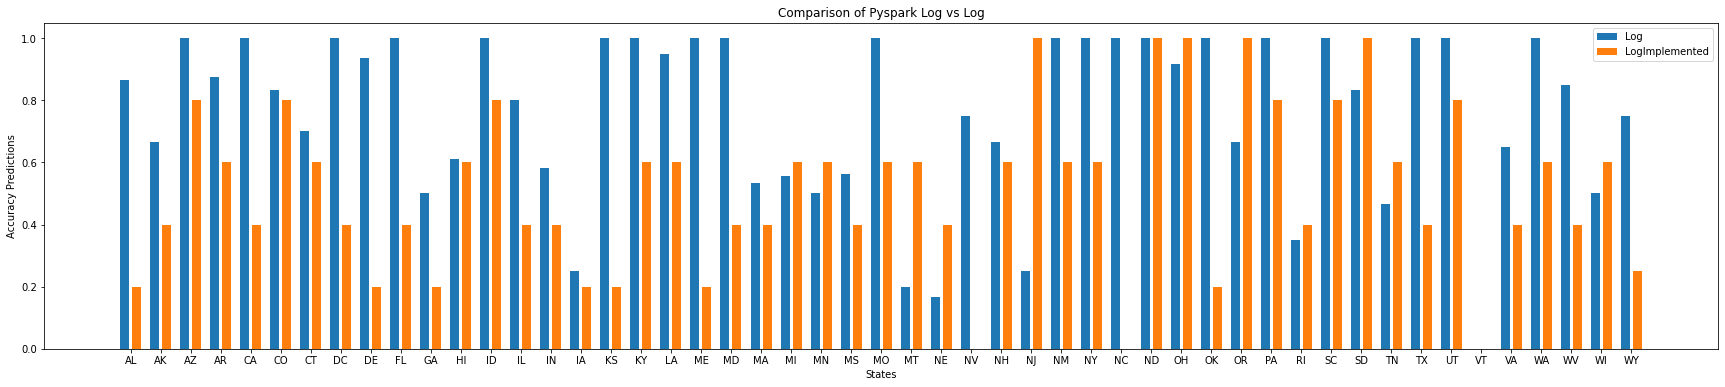

In [134]:
#Graph results
xaxisEntity = np.arange(len(xlabel))
fig = plt.figure(figsize = (30, 6))

LOGyvalues = [prediction[1] for prediction in selfLog]

plt.bar(xaxisEntity - 0.2, yvalues, 0.3, label = 'Log')
plt.bar(xaxisEntity + 0.2, LOGyvalues, 0.3, label = 'LogImplemented')
  
plt.xticks(xaxisEntity, xlabel)
plt.xlabel("States")
plt.ylabel("Accuracy Predictions")
plt.title("Comparison of Pyspark Log vs Log")
plt.legend()
plt.show()
